In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [4]:
recall=[]
with open("/share/data/mei-work/kangrui/github/ssref/result/sentence-transformers_all-MiniLM-L6-v2/2023-03-23T21-50-03/log.txt") as f:
    for line in f:
        strline=line.strip().strip(" ")
        if strline[0]=='n':
            number=strline.split(":")[1]
            
        elif strline[0]=='{':
            dict_obj=eval(strline)
            
            recall.append(float(dict_obj['recall']))
print(recall)


[0.6657287563308948, 0.7234946539110861, 0.7771243669105233, 0.8231570061902083, 0.008638154192459202, 0.015756893640967922, 0.026364659538548114, 0.04262802476083286, 0.013308947664603265, 0.022031513787281937, 0.03486212718064153, 0.057175014068655036, 0.010692177827799663, 0.020146314012380418, 0.03384918401800788, 0.055289814293753514, 0.027124366910523355, 0.04178390545863815, 0.06415306696679797, 0.09586381541924592, 0.01820483961733258, 0.03027574563871694, 0.04797411367473269, 0.07335396736072032]


In [14]:
testloss=[]
with open("/share/data/mei-work/kangrui/github/ssref/result/sentence-transformers_all-MiniLM-L6-v2/2023-03-23T21-50-03/log.txt") as f:
    for line in f:
        line=line.strip()
        if line[0]=='[':
            line=line.split(']')[1].strip()
            x=line.split(' ')[0]
            if x=='Test':
                loss=float(line.split(' ')[2])
                testloss.append(loss)
print(testloss)

[0.00787371, -0.01053557, -0.01129849, -0.01210353, -0.01241407, -0.01250216, -0.01264923, -0.01245895, -0.0126636, -0.01278129, -0.01330151, -0.01325258, -0.01352037, -0.0134289, -0.01331984, -0.0138097, -0.01403218, -0.01398601]


In [7]:
top200=[recall[idx] for idx in range(0,len(recall),4)]
top200

[0.6657287563308948,
 0.008638154192459202,
 0.013308947664603265,
 0.010692177827799663,
 0.027124366910523355,
 0.01820483961733258]

In [8]:
def plot_arrays(x,y1, xlabel,ylabel,yscle='linear',show_diff=False):
    fig = plt.figure()
    x = x
    plt.yscale(yscle)
    plt.plot(x, y1)
    plt.xlabel(f'{xlabel}')
    plt.ylabel(f'{ylabel}')
    plt.legend()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


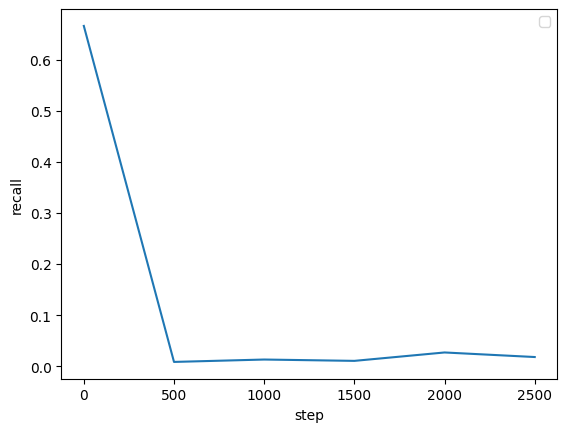

In [10]:
x=[idx*500 for idx in range(len(top200))]
plot_arrays(x,top200,'step',"recall")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


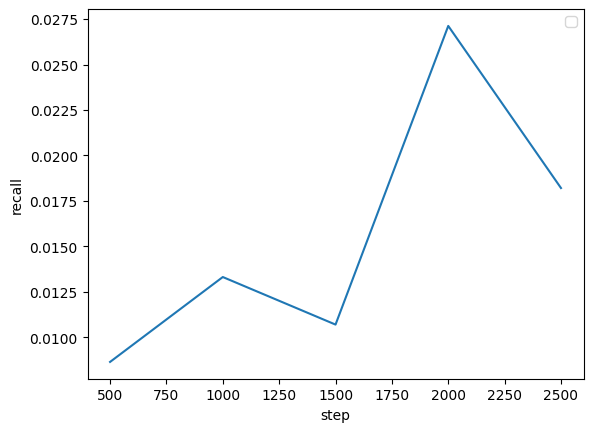

In [11]:
x=[idx*500 for idx in range(len(top200))]
plot_arrays(x[1:],top200[1:],'step',"recall")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


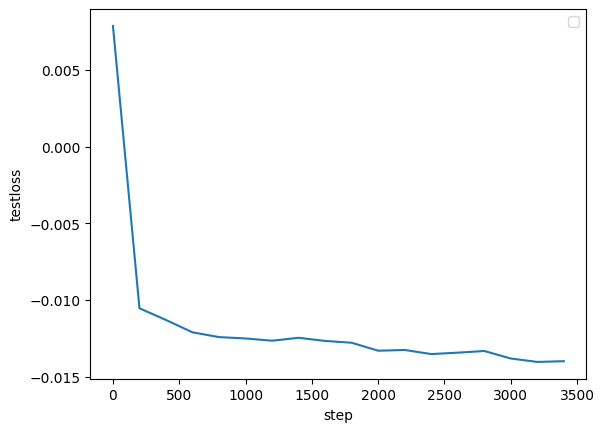

In [15]:
x=[idx*200 for idx in range(len(testloss))]
plot_arrays(x,testloss,'step',"testloss")